# Pre-Processing

In [34]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/email-spam-dedection/mail_data.csv


In [35]:
df = pd.read_csv('/kaggle/input/email-spam-dedection/mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [37]:
df.duplicated().sum()

415

In [38]:
# Drop Duplicates 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [39]:
# Convert to lowercases
df['Message'] = df['Message'].str.lower()

In [40]:
# Remove punctuation and other symbols
import string

translator = str.maketrans('', '', string.punctuation)
df['Message'] = df['Message'].str.translate(translator)

In [41]:
df.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [42]:
# Delete stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Delete Stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Delete stopwords in column 'Message'
df['Message'] = df['Message'].apply(tokenize_and_remove_stopwords)

In [43]:
df.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, goes, usf, lives, around, t..."


# EDA

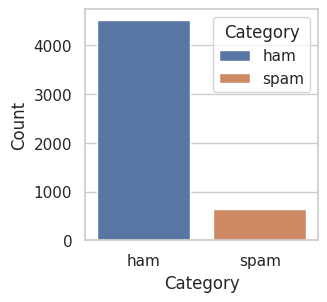

Category
ham     4516
spam     641
Name: count, dtype: int64


In [44]:
# Row Distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
sns.countplot(x="Category", data=df, hue="Category", dodge=False)
plt.ylabel('Count')
plt.show()

category_counts = df['Category'].value_counts()
print(category_counts)

In [45]:
vis_df = df.copy()

# Calculate number of characters
vis_df['num_characters'] = df['Message'].apply(lambda x: sum(len(word) for word in x))

# Calculate number of words
vis_df['num_words'] = df['Message'].apply(len)

vis_df.head()

,Category,Message,num_characters,num_words
0,ham,"[go, jurong, point, crazy, available, bugis, n...",67,16
1,ham,"[ok, lar, joking, wif, u, oni]",18,6
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",113,23
3,ham,"[u, dun, say, early, hor, u, c, already, say]",27,9
4,ham,"[nah, dont, think, goes, usf, lives, around, t...",36,8


In [46]:
# Word Distributions
vis_df[['num_characters', 'num_words']].describe()

# Ham
vis_df[vis_df['Category'] == 'ham'][['num_characters', 'num_words']].describe()

#Spam
vis_df[vis_df['Category'] == 'spam'][['num_characters', 'num_words']].describe()


,num_characters,num_words
count,641.000000,641.000000
mean,90.207488,16.566303
std,22.694830,4.852421
min,5.000000,1.000000
25%,81.000000,14.000000
50%,95.000000,17.000000
75%,106.000000,20.000000
max,137.000000,28.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


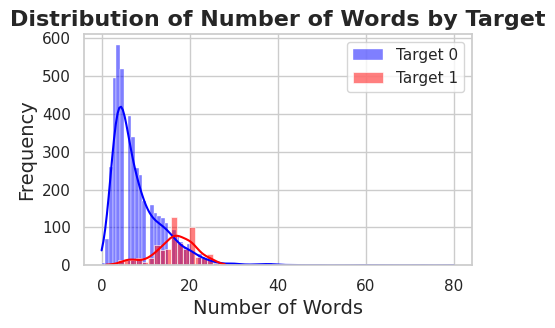

In [47]:
# Distribution Words by Target

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.histplot(vis_df[vis_df['Category'] == 'ham']['num_words'], color='blue', label='Target 0', kde=True)
sns.histplot(vis_df[vis_df['Category'] == 'spam']['num_words'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

plt.legend()
sns.set(style='whitegrid')
plt.show()

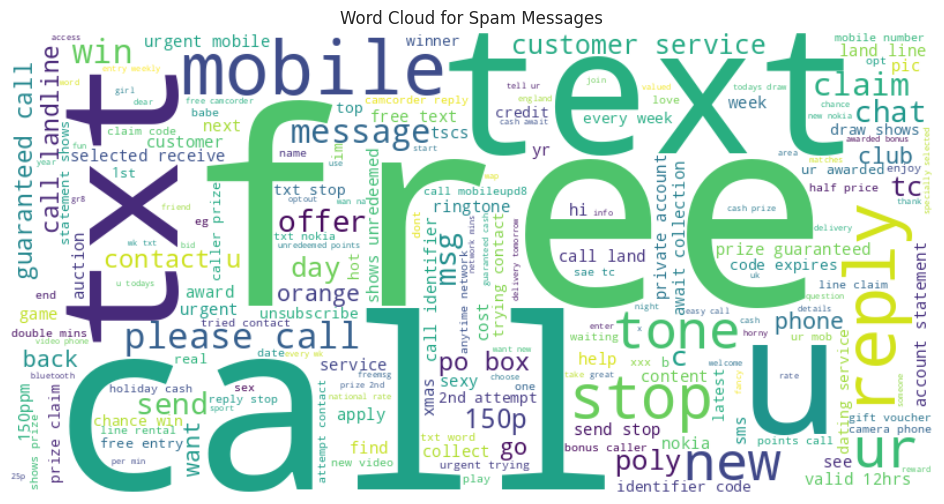

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tokenized messages belonging to 'spam' category
spam_text = ' '.join(df[df['Category'] == 'spam']['Message'].apply(' '.join))

# Create WordCloud object
spam_wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(spam_text)

# Plot the WordCloud
plt.figure(figsize = (15, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

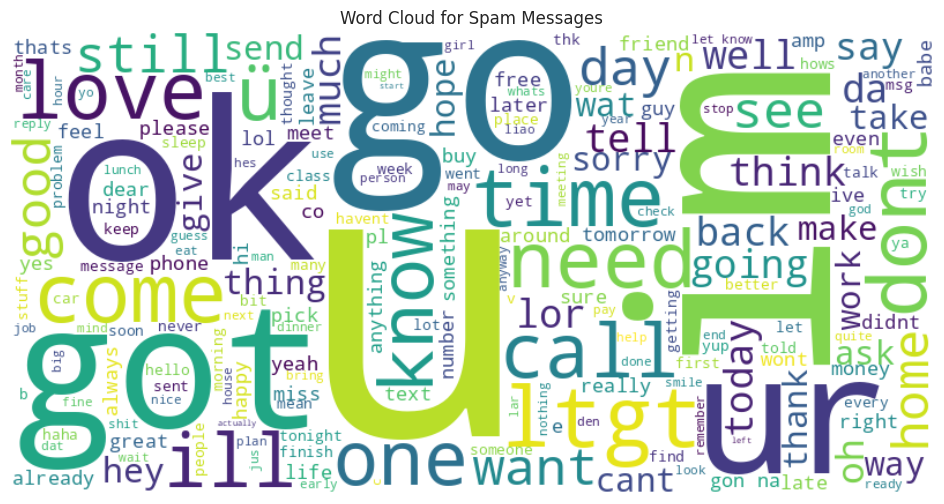

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tokenized messages belonging to 'ham' category
spam_text = ' '.join(df[df['Category'] == 'ham']['Message'].apply(' '.join))

# Create WordCloud object
spam_wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(spam_text)

# Plot the WordCloud
plt.figure(figsize = (15, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Word Embedding: Word2Vec Skip-gram

In [50]:
# Tokenization already done in preprocessing, showing df
print('Tokenized Text:\n', df['Message'])

# Count tokens
count = 0
for tokens in df['Message']:
    count += len(tokens)
    
print('Total no. of tokens obtained: ', count)

Tokenized Text:
 0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, £750, pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Message, Length: 5157, dtype: object
Total no. of tokens obtained:  47970


In [51]:
from gensim.models import Word2Vec

# Define embedding dimension = 100
EMBEDDING_DIM = 100

# Training model Word2Vec Skip-gram
word2vec_model = Word2Vec(sentences=df['Message'], vector_size=EMBEDDING_DIM, window=5, sg=1, min_count=1)

# Expand to see all the words (vocab) trained on Word2Vec Model
vocabulary = word2vec_model.wv.key_to_index
print(sorted([w for w in vocabulary]))

['0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186',

In [52]:
# Show embedding with 'attached' word
print("Embedding for 'attached':", word2vec_model.wv['attached'])

Embedding for 'attached': [-0.01018067  0.05538695 -0.00612797 -0.00557147 -0.00264331 -0.06220915
  0.00154477  0.08298718 -0.00980801 -0.04336923  0.00468432 -0.04075756
 -0.00051135  0.01175276  0.01169909 -0.01327125  0.00089211 -0.04592872
  0.01718386 -0.07193921  0.02909704  0.01332659  0.00624178 -0.02628548
 -0.01536743  0.01267058 -0.0429118  -0.01335154 -0.03190374 -0.00377169
  0.04897616  0.00848698 -0.01368845 -0.02279666 -0.01438333  0.05543721
 -0.002454   -0.06594213 -0.03626281 -0.0870294  -0.0126807  -0.04011342
 -0.02405954 -0.02144065  0.03178529 -0.01404576 -0.04543095 -0.02138124
  0.00992278  0.01966678  0.03827876 -0.02885    -0.01446744  0.00626327
 -0.01599715  0.01061477  0.00709567  0.02010023 -0.02782836 -0.02875962
  0.0182642   0.00985357  0.00487461  0.00171095 -0.06051495  0.05097222
  0.02603969  0.01011303 -0.06200857  0.03839124 -0.02335694  0.014078
  0.05556232 -0.03365179  0.0391002   0.0216741   0.00314352  0.0091317
 -0.05650849  0.01828863 -0.

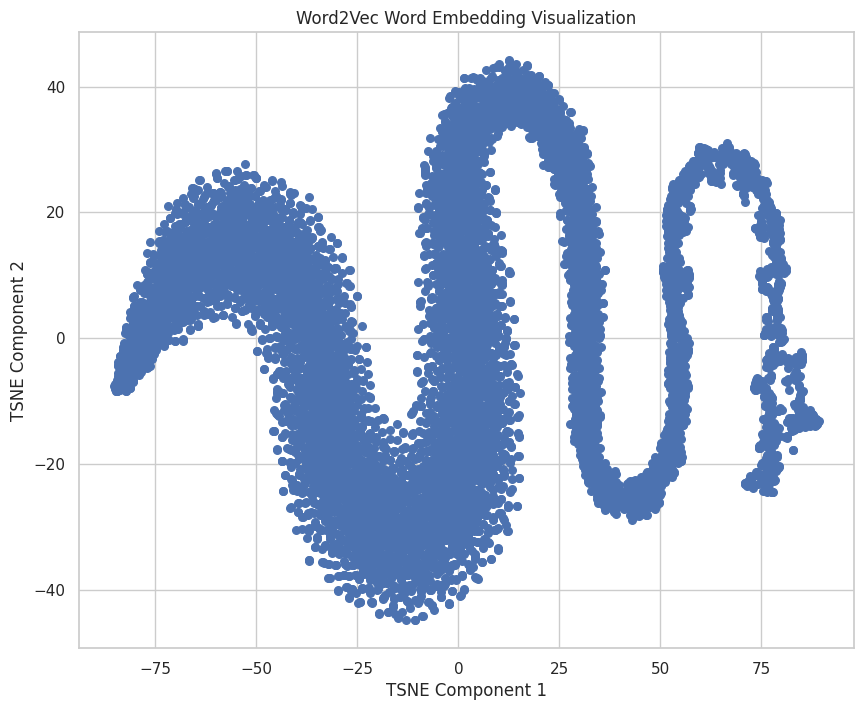

In [53]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get vector embeddings and its words
word_vectors = word2vec_model.wv.vectors
words = word2vec_model.wv.index_to_key

# Dimentionality reduction using tsne
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting words into a graph
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', s=30)

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('Word2Vec Word Embedding Visualization')
plt.grid(True)
plt.show()

# Expand code below to see word embedding visualization with the annotated words

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37413 (\N{CJK UNIFIED IDEOGRAPH-9225}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12328 (\N{HANGZHOU NUMERAL EIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 14

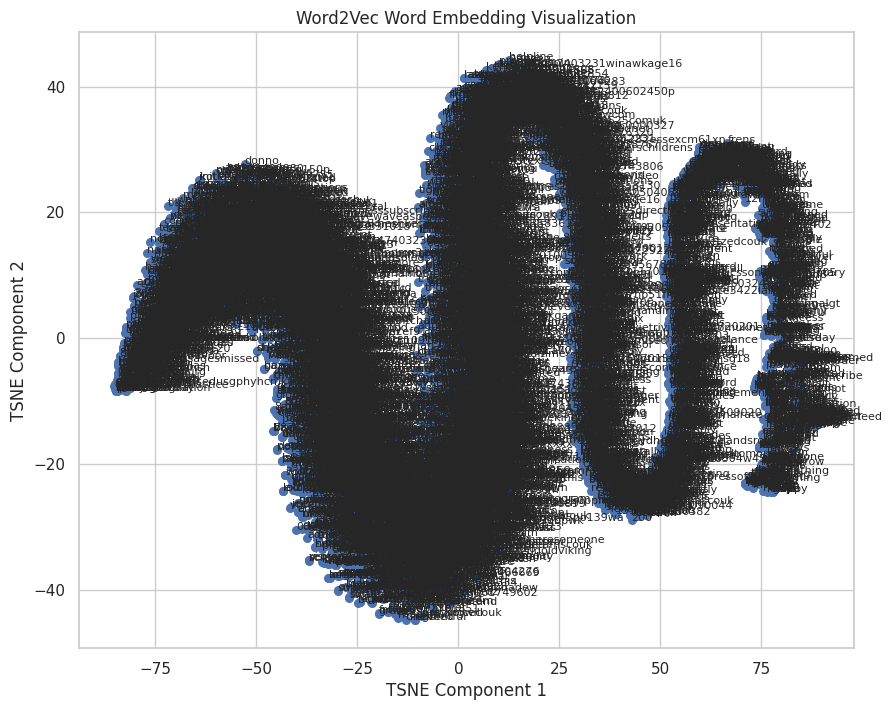

In [54]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get vector embeddings and its words
word_vectors = word2vec_model.wv.vectors
words = word2vec_model.wv.index_to_key

# Dimentionality reduction using tsne
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting words into a graph
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', s=30)

# Print the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('Word2Vec Word Embedding Visualization')
plt.grid(True)
plt.show()

In [55]:
# Function to convert tokenized words to average embedding using Word2Vec model
def tokens_to_avg_word2vec(tokens, model):
    avg = np.zeros((model.vector_size,))
    valid_words = 0
    for word in tokens:
        if word in model.wv:
            avg += model.wv[word]
            valid_words += 1
    if valid_words > 0:
        avg = avg / valid_words
    return avg

# Apply embeddings using Word2Vec model
df['AvgEmbeddingWord2Vec'] = df['Message'].apply(lambda x: tokens_to_avg_word2vec(x, word2vec_model))

# Display results
print(df['AvgEmbeddingWord2Vec'])

0       [-0.05118140070408117, 0.2170621296390891, 0.0...
1       [-0.05196829388538996, 0.23660345003008842, 0....
2       [-0.10190785200456562, 0.1933396282079427, 0.0...
3       [-0.05756407562229368, 0.29699018349250156, 0....
4       [-0.06998526048846543, 0.25256271939724684, 0....
                              ...                        
5567    [-0.13401149096898735, 0.2366534134373069, 0.0...
5568    [-0.0539133899534742, 0.25268567850192386, 0.0...
5569    [-0.01766953303012997, 0.04445892944931984, 0....
5570    [-0.10051019606180489, 0.2423536859984909, 0.0...
5571    [-0.07974002634485562, 0.21001939723889032, 0....
Name: AvgEmbeddingWord2Vec, Length: 5157, dtype: object


# Prepare for Training

In [56]:
# Create column target with label encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Category'])

df["Filtered Message"] = df["Message"].apply(lambda x: ' '.join(x))
df.rename(columns={"Message": "Tokenized Message"}, inplace=True)

df

,Category,Tokenized Message,AvgEmbeddingWord2Vec,Target,Filtered Message
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[-0.05118140070408117, 0.2170621296390891, 0.0...",0,go jurong point crazy available bugis n great ...
1,ham,"[ok, lar, joking, wif, u, oni]","[-0.05196829388538996, 0.23660345003008842, 0....",0,ok lar joking wif u oni
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[-0.10190785200456562, 0.1933396282079427, 0.0...",1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[-0.05756407562229368, 0.29699018349250156, 0....",0,u dun say early hor u c already say
4,ham,"[nah, dont, think, goes, usf, lives, around, t...","[-0.06998526048846543, 0.25256271939724684, 0....",0,nah dont think goes usf lives around though
...,...,...,...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, £750, pou...","[-0.13401149096898735, 0.2366534134373069, 0.0...",1,2nd time tried 2 contact u u £750 pound prize ...
5568,ham,"[ü, b, going, esplanade, fr, home]","[-0.0539133899534742, 0.25268567850192386, 0.0...",0,ü b going esplanade fr home
5569,ham,"[pity, mood, soany, suggestions]","[-0.01766953303012997, 0.04445892944931984, 0....",0,pity mood soany suggestions
5570,ham,"[guy, bitching, acted, like, id, interested, b...","[-0.10051019606180489, 0.2423536859984909, 0.0...",0,guy bitching acted like id interested buying s...


In [57]:
from sklearn.model_selection import train_test_split

# Initialize dependent and independent variable
X = df['Filtered Message']
y = df['Target']

In [58]:
# Add padding sequences so all data have the same vector dimension
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convert tokenized sequences to integer sequences
X_seq = tokenizer.texts_to_sequences(X)

# Get the maximum sentence length from integer sequences
max_length = max(len(seq) for seq in X_seq)

# Pad integer sequences with appending zeros
X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post')

# X_pad now sized as maximum length
print("Maximum length of sequences:", max_length)
X_pad

Maximum length of sequences: 80


array([[   7, 3727,  623, ...,    0,    0,    0],
       [  11,  194, 1172, ...,    0,    0,    0],
       [  14,  405,    4, ...,    0,    0,    0],
       ...,
       [9499, 1522, 9500, ...,    0,    0,    0],
       [ 369, 9502, 3690, ...,    0,    0,    0],
       [2188,  417,  191, ...,    0,    0,    0]], dtype=int32)

In [59]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (zeros). This Vector is filled with zero

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size: ",vocab_size)

Vocab size:  9503


In [60]:
# Function to create weight matrix from word2vec gensim model
def get_embed_matrix(model, vocab):    
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [61]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_embed_matrix(word2vec_model, tokenizer.word_index)

print(embedding_vectors[1])

[-0.02118289  0.33396393  0.0144038  -0.08443072  0.05606918 -0.50376594
  0.17941332  0.60399944 -0.23700874 -0.22065923 -0.00327379 -0.35876542
  0.03606128  0.17652507 -0.02009618 -0.13101968  0.13824105 -0.22149254
 -0.03263743 -0.55468726  0.25594515  0.12976363  0.10413805 -0.26214352
 -0.19837146  0.0100774  -0.21023743 -0.04605277 -0.32476389 -0.03020795
  0.25383243 -0.05180731  0.07298911 -0.29441789 -0.05566246  0.23318437
  0.18796809 -0.45040086 -0.28333953 -0.67098975 -0.02321205 -0.15648851
 -0.08133499 -0.24871652  0.16487937 -0.03237151 -0.3226532  -0.18983144
  0.28578672  0.12392101  0.18756011 -0.19040589 -0.05163888  0.08251882
 -0.11781998  0.0914449   0.13269477  0.12767814 -0.20965961 -0.04740753
  0.14488964  0.02249903  0.1073565   0.03020182 -0.41011763  0.39035258
  0.19272377  0.15071635 -0.48085156  0.23443359 -0.02653397  0.20395175
  0.34232336 -0.15157491  0.37997985  0.15308692  0.02155921  0.05740306
 -0.42247081  0.13814776 -0.09152482  0.03446047 -0

In [62]:
# Train test split 1:5
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4125, 80)
(4125,)
(1032, 80)
(1032,)


In [63]:
# Oversampling the minority class in X_train
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

oversample = RandomUnderSampler(sampling_strategy='majority')
X_train_sampled, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 505, 1: 505})


# LSTM

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.initializers import Constant

# Defining Neural Network for LSTM
model_lstm = Sequential(name="Word2Vec_LSTM")

# Input layer
model_lstm.add(Input(shape=(max_length,), name="input"))

# Add the embedding layer to the model
model_lstm.add(Embedding(input_dim=vocab_size, 
                        output_dim=EMBEDDING_DIM, 
                        trainable=False, 
                        embeddings_initializer=Constant(embedding_vectors)))

# GRU
model_lstm.add(LSTM(units=32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(16, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.01), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_lstm.summary()

Model: "Word2Vec_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 80, 100)        │       950,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 967,869 (3.69 MB)

 Trainable params: 17,569 (68.63 KB)

 Non-trainable params: 950,300 (3.63 MB)

In [91]:
history = model_lstm.fit(X_train, 
                        y_train, 
                        epochs=10,
                        validation_split=0.1,
                        validation_steps=1,
                        batch_size=32)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 44s 367ms/step - accuracy: 0.8616 - loss: 0.4422 - val_accuracy: 0.9062 - val_loss: 0.3197
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8655 - loss: 0.3981 - val_accuracy: 0.8438 - val_loss: 0.4420
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8736 - loss: 0.3896 - val_accuracy: 1.0000 - val_loss: 0.1267
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8798 - loss: 0.3742 - val_accuracy: 0.8438 - val_loss: 0.4389
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8801 - loss: 0.3731 - val_accuracy: 0.8125 - val_loss: 0.4844
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8836 - loss: 0.3670 - val_accuracy: 0.9688 - val_loss: 0.1831
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8799 - loss: 0.3704 - val_accuracy: 0.8438 - val_loss: 0.4385
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8849 - loss: 0.3601 - val_ac

# GRU

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.initializers import Constant

# Defining Neural Network for GRU
model_gru = Sequential(name="Word2Vec_GRU")

# Input layer
model_gru.add(Input(shape=(max_length,), name="input"))

# Add the embedding layer to the model
model_gru.add(Embedding(input_dim=vocab_size, 
                        output_dim=EMBEDDING_DIM, 
                        trainable=False, 
                        embeddings_initializer=Constant(embedding_vectors)))

# GRU
model_gru.add(GRU(units=128))
model_gru.add(Dropout(0.1))
model_gru.add(Dense(16, activation='relu'))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
model_gru.compile(optimizer=Adam(learning_rate=0.01), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_gru.summary()

Model: "Word2Vec_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 80, 100)        │       950,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,040,701 (3.97 MB)

 Trainable params: 90,401 (353.13 KB)

 Non-trainable params: 950,300 (3.63 MB)

In [95]:
history = model_gru.fit(X_train, 
                        y_train, 
                        epochs=10,
                        validation_split=0.1,
                        validation_steps=1,
                        batch_size=32)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9564 - loss: 0.1450 - val_accuracy: 0.9688 - val_loss: 0.0796
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9663 - loss: 0.0999 - val_accuracy: 0.9375 - val_loss: 0.1359
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9743 - loss: 0.0941 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9708 - loss: 0.0959 - val_accuracy: 0.9688 - val_loss: 0.2278
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9693 - loss: 0.1004 - val_accuracy: 0.9062 - val_loss: 0.1806
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9776 - loss: 0.0752 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9711 - loss: 0.0874 - val_accuracy: 0.9688 - val_loss: 0.1652
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9706 - loss: 0.0980 - val_

# Evaluation

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    
    # Predict result to 1 (spam) if probability > 0.5
    y_pred = (np.round(y_pred_prob))
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print("\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    
    # Print classification report
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

## LSTM Model Evaluation

In [92]:
# Evaluate Model
score = model_lstm.evaluate(X_test, y_test, batch_size=32) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8585 - loss: 0.4080
Test loss:  0.38978126645088196
Test accuracy:  0.8682170510292053


LSTM Model Evaluation:
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Accuracy: 0.8682170542635659
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       136

    accuracy                           0.87      1032
   macro avg       0.43      0.50      0.46      1032
weighted avg       0.75      0.87      0.81      1032



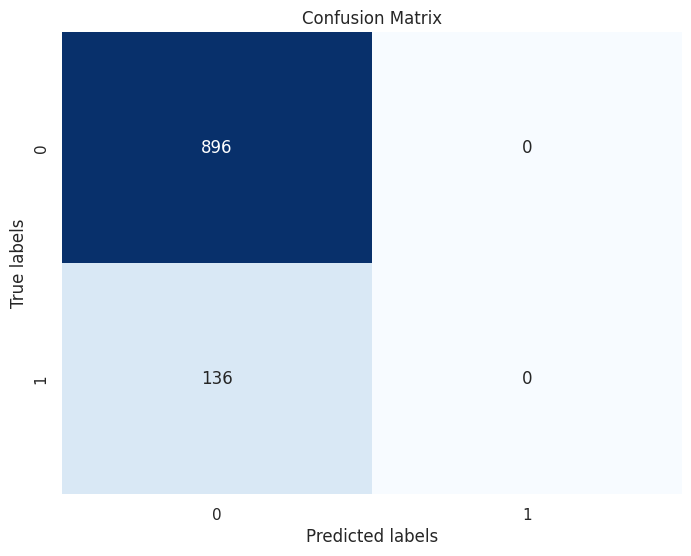

In [93]:
print("LSTM Model Evaluation:")
evaluate_model(model_lstm, X_test, y_test)

## GRU Model Evaluation

In [96]:
# Evaluate Model
score = model_gru.evaluate(X_test, y_test, batch_size=32) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9807 - loss: 0.0821
Test loss:  0.078413225710392
Test accuracy:  0.9748061895370483


GRU Model Evaluation:
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Accuracy: 0.9748062015503876
Precision: 0.9104477611940298
Recall: 0.8970588235294118
F1-Score: 0.9037037037037037
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.91      0.90      0.90       136

    accuracy                           0.97      1032
   macro avg       0.95      0.94      0.94      1032
weighted avg       0.97      0.97      0.97      1032



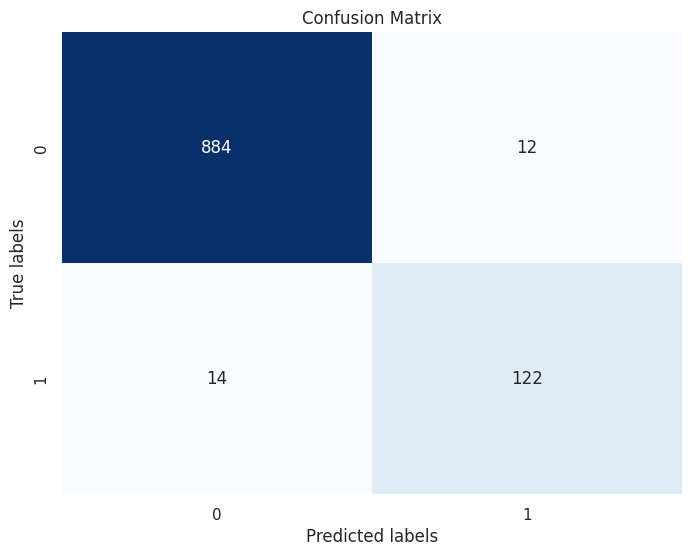

In [97]:
print("GRU Model Evaluation:")
evaluate_model(model_gru, X_test, y_test)

# ............................................................................................

In [66]:
# from keras import backend as K
# K.clear_session()

# TEST with Random Forest

Accuracy:  0.9176356589147286 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95       896
           1       0.82      0.48      0.60       136

    accuracy                           0.92      1032
   macro avg       0.87      0.73      0.78      1032
weighted avg       0.91      0.92      0.91      1032



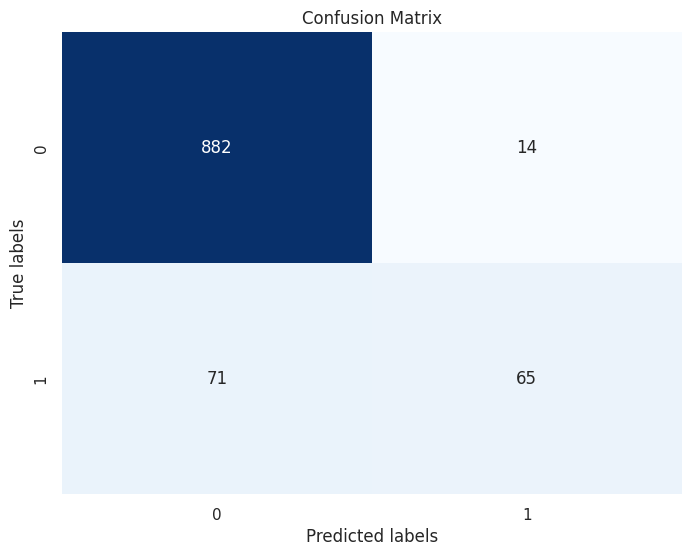

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

# Classification report
print("Accuracy: ",accuracy_score(y_test,y_pred),"\n\n",classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()